In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# display plots in the notebook
%matplotlib inline
# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

import seaborn as sb
import pandas as pd
import numpy as np
from scipy import stats
import random

In [2]:
np.random.seed(seed=0)

In [3]:
from cloud import *
from plot import *

In [4]:
cloud = Cloud(num_leafs=48,
              num_hosts_per_leaf=48,
              max_vms_per_host=20,
              num_tenants=100,
              min_vms_per_tenant=10,
              max_vms_per_tenant=100,
              vm_dist='expon',
              num_groups=1000,
              min_group_size=5,
              group_size_dist='uniform',
              placement_dist='uniform',
              num_bitmaps=10,
              generate_bitmaps=True,
              multi_threaded=True,
              num_threads=4)

network: initialized.
tenants: initialized.
placement: passed this point.


In [5]:
plot = Plot(plt, Data(cloud))

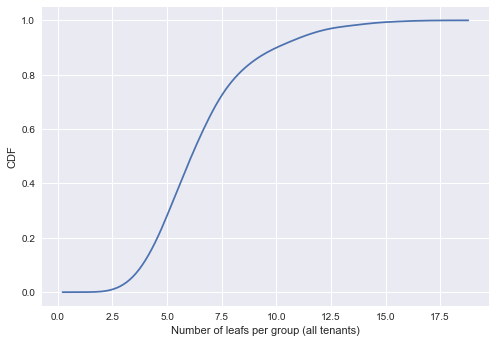

In [6]:
plot.cdf_leafs_for_all_tenants()

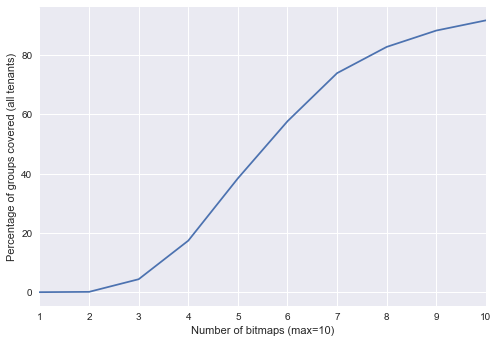

In [7]:
plot.cdf_groups_covered_with_varying_bitmaps()

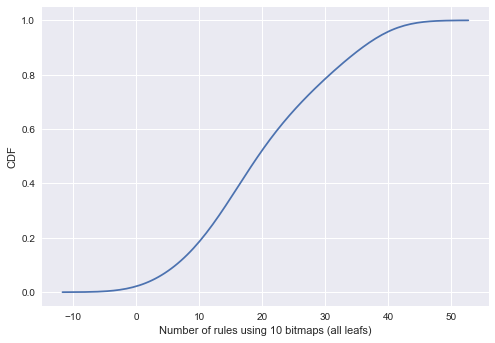

In [8]:
plot.cdf_rules_for_all_leafs()

In [9]:
# plot.cdf_redundancy_for_all_tenants()

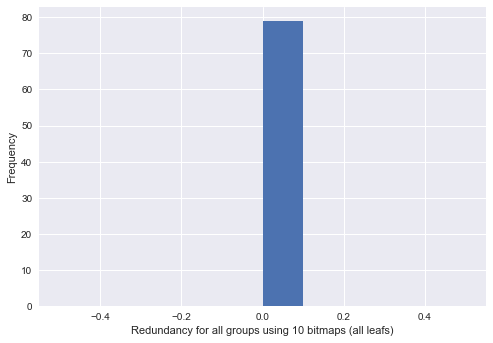

In [10]:
plot.hist_redundancy_for_all_tenants()

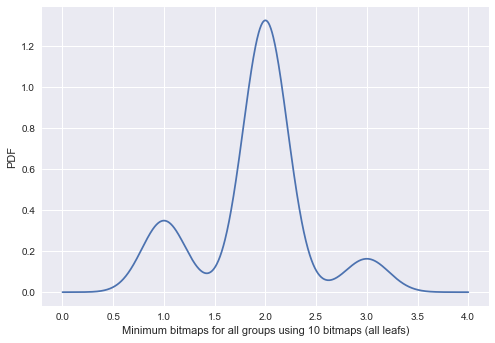

In [11]:
plot.pdf_min_bitmaps_for_all_tenants()

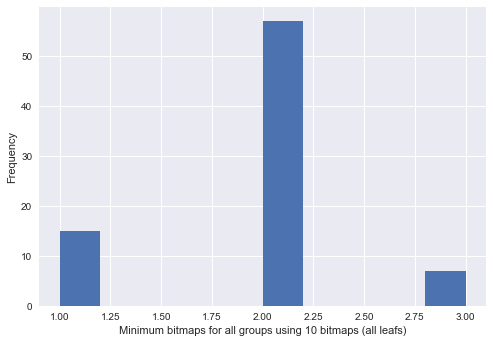

In [12]:
plot.hist_min_bitmaps_for_all_tenants()